# Car Price Prediction

### Algorithm: Linear Regression
Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

### Import the dataset

Import the dataset. The dataset csv file is present in the same folder as this program. If you have it in a different location, please use the full path.

In [2]:
data = pd.read_csv("CAR_DETAILS_FROM_CAR_DEKHO.csv")

### Exploratory Data Analysis

First 5 records can be fetched using data.head(). This gives and idea of how the data looks like. If you want to see for example 10 records, use data.head(10)

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Given below, identify the number of rows and columns in the dataset. data.shape gives the output (4340, 8). I am fetching first value as rows and second value as columns.

In [4]:
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Number of rows in the dataset: 4340
Number of columns in the dataset: 8


In [5]:
print("There are {} unique car models available".format(len(data["name"].unique())))

There are 1491 unique car models available


Can you compare? There are 1491 car models. The total dataset size itself is 4340. If it is uniformly distributed, we could say, there are only approximately 3 rows data representing each car model. Do we have enough data to capture each car model? Will the model be able to predict using this little data? Lets wait and watch!

In [6]:
print ("Manufacturing year of car ranges from {} to {}".format(data['year'].min(), data['year'].max()))

Manufacturing year of car ranges from 1992 to 2020


In [7]:
print ("Minimum Selling Price:", data['selling_price'].min())
print ("Maximum Selling Price:", data['selling_price'].max())
print ("Average Selling Price:", round(data['selling_price'].mean(), 2)) #Limiting to 2 decimal places

Minimum Selling Price: 20000
Maximum Selling Price: 8900000
Average Selling Price: 504127.31


In [8]:
print("Distance driven ranges from {}km to {}km".format(data['km_driven'].min(), data['km_driven'].max()))

Distance driven ranges from 1km to 806599km


In [9]:
print("Available fuel types", data.fuel.unique())

Available fuel types ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [10]:
print("Available seller types", data.seller_type.unique())

Available seller types ['Individual' 'Dealer' 'Trustmark Dealer']


In [11]:
print("Available transmission types", data.transmission.unique())

Available transmission types ['Manual' 'Automatic']


In [12]:
print("Available ownership details", data.owner.unique())

Available ownership details ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


## Data Preprocessing

See how the car model names look like.

In [13]:
data.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

We previously checked and found that we have 1491 types of car models available in column "name". Having too much categories for a dataset this size (around 4000) is not enough.

The name already has lots of details embedded in a single column. Like make, model, etc. For example, from "Hyundai Verna 1.6 SX", I will extract make="Hyundai", model="Verna".

I am splitting the column "name" and copying to a new dataframe. From there I take only the two columns which indicate make and model and put it back in our original dataset. Later deleting the old "name" column.

In [14]:
new = data['name'].str.split(" ", expand = True)

In [15]:
new.head()

,0,1,2,3,4,5,6,7,8,9
0,Maruti,800,AC,None,None,None,None,None,None,None
1,Maruti,Wagon,R,LXI,Minor,None,None,None,None,None
2,Hyundai,Verna,1.6,SX,None,None,None,None,None,None
3,Datsun,RediGO,T,Option,None,None,None,None,None,None
4,Honda,Amaze,VX,i-DTEC,None,None,None,None,None,None


In [16]:
data['car_make'] = new[0]
data['car_model'] = new[1]

In [17]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_make,car_model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [18]:
data.drop(['name'], axis=1, inplace=True)

In [19]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_make,car_model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


See below, we have minimized the number of categories in "name" column. Still keeping vital information. We now have 29 car make and 185 car models available.

In [20]:
len(data.car_make.unique())

29

In [21]:
len(data.car_model.unique())

185

### Splitting features and labels

"selling_price" is a special column. Because that is what we will be predicting. So, split that column separately from the rest of the data.

It is not like our model should not see this "selling_price" column. It should see it when training. That is when it sees and learns. But not during testing.

Remember the basic terminology which we will use often going forward.

"Features means the columns which provide information; 
Label (or) target means column which we will predict"

General way of indicating is by using upper case X for features, and lower case y for label.

In [22]:
y = data['selling_price']
X = data.drop(['selling_price'], axis=1)

### Scale numerical values

The next step will be to scale numerical values (squish them between 0 to 1). This will make the algorithm understand the values better.

In [23]:
numerical_columns = ['year', 'km_driven']

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(X)
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])

In [25]:
data_scaled.head()

,year,km_driven,fuel,seller_type,transmission,owner,car_make,car_model
0,0.535714,0.086783,Petrol,Individual,Manual,First Owner,Maruti,800
1,0.535714,0.061988,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,0.714286,0.123976,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,0.892857,0.057028,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,0.785714,0.174807,Diesel,Individual,Manual,Second Owner,Honda,Amaze


### One hot encode categorical values

Also, the algorithm cant understand textual data (here text data are categorical values). So these have to be somehow converted to numeric form. So, we can one hot encode categorical data. 

For example, "transmission" column has one of two values - manual, automatic. Instead of this one column, one hot encoding will give two separate columns - "transmission_manual" & "transmission_automatic". Whichever value is true, that column will have a value of 1. Or 0 otherwise. Therby, finally, all textual data is replaced.

At the end of one hot encoding, we will have a lot more columns than before. Because, each category is represented in a single column.

In [26]:
#one hot encode
data_preprocessed = pd.get_dummies(data_scaled)

In [27]:
data_preprocessed.shape

(4340, 231)

In [28]:
data_preprocessed.head(1)

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,car_model_Xcent,car_model_Xenon,car_model_Xylo,car_model_Yaris,car_model_Yeti,car_model_Zen,car_model_Zest,car_model_i10,car_model_i20,car_model_redi-GO
0,0.535714,0.086783,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Split training and testing set

Initially we had X representing features, and y representing label. X has undergone lot of transformations, and is now in the name of data_preprocessed. So, now we split the data_preprocessed and y into training and testing sets. The ratio chosen is 70:30 for training data :testing data. It is done using test_size=0.3. You can adjust this ratio according to your needs.

Finally, 

1) "data_preprocessed" is split into X_train & X_test in 70:30 ratio

2) "y" is split into y_train & y_test in 70:30 ratio

This "train_test_split" automaticlly shuffles the data while splitting. This shuffling is a good thing because it eliminates any particular grouping or order that might exist naturally in the dataset. In case you are re-running the program, this shuffling could make the data end up differently each time, and the testing results would vary. That's why we set a "random_state". It could be any integer. It makes sure, you get same results when you run the program any number of times.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, y, test_size=0.3, random_state=10)

### Linear regression - model training

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Testing

In [31]:
y_pred = model.predict(X_test)

### Results

For the first 15 rows of testing set, predicted value (y_pred) and actual value (y_test) are plotted below. See how the model has predicted good values even with little data.

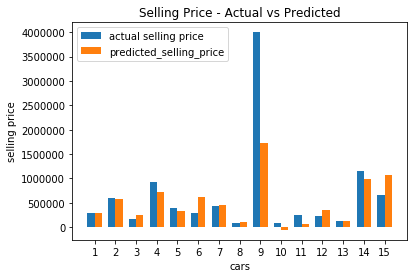

In [32]:
import matplotlib.pyplot as plt
ind = np.arange(15)
width = 0.35

plt.bar(ind, y_test[:15], width, label='actual selling price')
plt.bar(ind+width, y_pred[:15], width, label='predicted_selling_price')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.legend(loc='best')

plt.xlabel("cars")
plt.ylabel("selling price")
plt.title("Selling Price - Actual vs Predicted")

plt.show()

Linear regression is a very basic machine learning algorithm. You can achieve better results with other algorithms. This is beyond the scope here. Because, the primary purpose of this notebook is to show you how to build a Linear Regression model.

In case you are willing to try, you can experiment with Decision Trees, Random Forest & XgBoost.